# Proyecto Final Area Imagenes - Luckas Diaz y Diego Pincheira

El objetivo de este proyecto final es desarrollar e implementar un algoritmo de búsqueda de imágenes similares basado en su contenido (Content Based Image Retrieval, CBIR). Para el desarrollo de este proyecto debe descargar la base de datos INRIA Holidays dataset. Debe descargar los archivos jpg1.tar.gz y jpg2.tar.gz.

Link de para descargar: http://lear.inrialpes.fr/people/jegou/data.php

Las imágenes de la base de datos sólo se pueden utilizar en este proyecto académico. Para cualquier otro uso se debe referenciar el trabajo: Herve Jegou, Matthijs Douze and Cordelia Schmid, "Hamming Embedding and Weak geometry consistency for large scale image search", Proceedings of the 10th European conference on Computer vision, October, 2008.

## Imports

In [28]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

import skimage.io as io
from skimage import color, io, exposure
from skimage.feature import hog

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

## Cargar datos a Colab

### Desde disco local

Aqui se deben cargar los archivos jpg1.tar.gz y jpg2.tar.gz

In [4]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

### Desde Drive

In [5]:
!ls

drive  sample_data


In [6]:
%cd drive/MyDrive/Proyecto-Imagenes/

/content/drive/MyDrive/Proyecto-Imagenes


In [7]:
!ls

jpg1  jpg1.tar.gz  jpg2  jpg2.tar.gz


In [8]:
!mkdir 'jpg1'
!mkdir 'jpg2'

mkdir: cannot create directory ‘jpg1’: File exists
mkdir: cannot create directory ‘jpg2’: File exists


In [ ]:
!tar -xvf  'jpg1.tar.gz' -C 'jpg1'
!tar -xvf  'jpg2.tar.gz' -C 'jpg2'

## Obtener paths de imagenes

In [9]:
path_jpg1 = 'jpg1/jpg'
path_jpg2 = 'jpg2/jpg'
Listado_jpg1 = os.listdir(path_jpg1)
Listado_jpg2 = os.listdir(path_jpg2)

## Convertir a Escalas de Grises

In [ ]:
Listado_jpg1_Gris = []
for imagen in Listado_jpg1:
  Listado_jpg1_Gris.append(color.rgb2gray(io.imread(path_jpg1 + '/' + imagen)))

Listado_jpg2_Gris = []
for imagen in Listado_Impostor:
  Listado_jpg2_Gris.append(color.rgb2gray(io.imread(path_jpg2 + '/' + imagen)))

## HOG

In [24]:
img = mpimg.imread(path_jpg1 + '/' + Listado_jpg1[1]) 

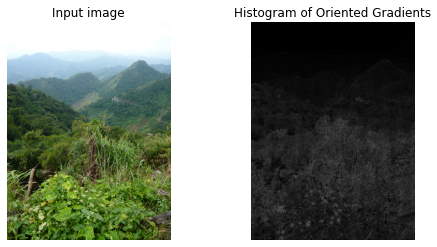

In [26]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## VGG 16

In [30]:
model = VGG16(weights='imagenet', include_top=False)

img_path = path_jpg1 + '/' + Listado_jpg1[1]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)